   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

C:\Users\Thabani Dlamini\AppData\Local\Temp\ipykernel_10968\4055039782.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


Accuracy: 0.7752808988764045
Confusion Matrix:
 [[86 23]
 [17 52]]


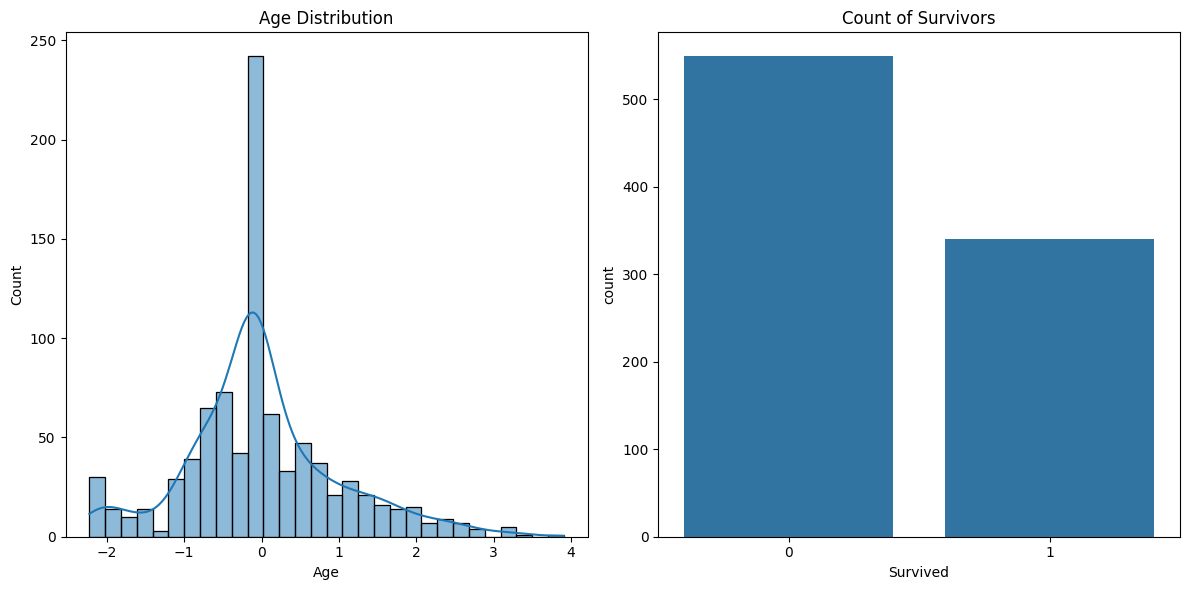

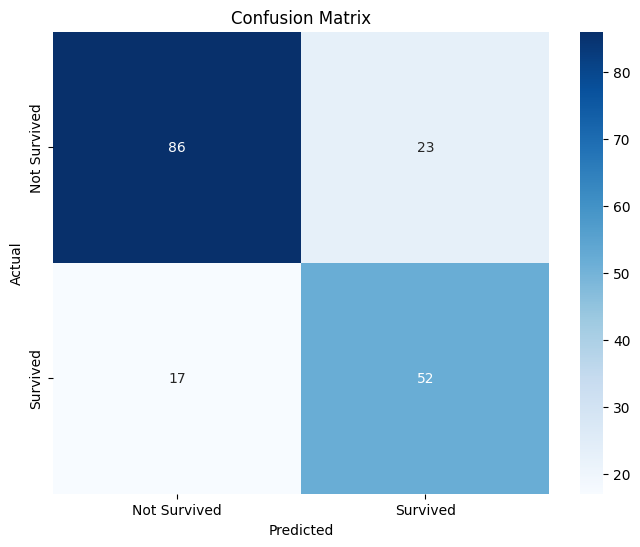

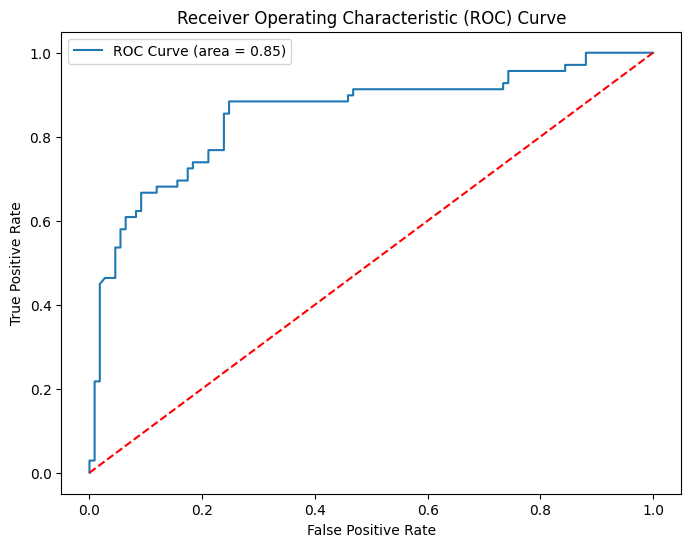

Interpretations: 
1) The dataset contains information about passengers on the titanic, including features such as age, sex, class, and whether they survived
2) Statistical summaries reveal the age distribution and ticket prices, which will be important for understanding survival rates
3) Missing values are handled: Age filled with median and rows with missing 'Embarked' dropped
4) Data is then split into training and testing sets (80/20).
5) The accuracy of the model indicates how well it predicts survival
6) The confusion matrix shows the breakdown of predicted versus actual survival outcomes, helping identify areas for improvement
&)The age distribution shows the range of ages aboard the titanic, which can be correlated with survival rates.
9)The count of survivors indicates the overall survival rate, which is crucial for understanding the impact of different factors.
The confusion matrix provides a visual representation of the model's performance, highlighting true and false positiv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

df = pd.read_csv('Titanic.csv') 

print(df.head())
print(df.describe())
print(df.info())

df['Age'].fillna(df['Age'].median(), inplace=True)
df.dropna(subset=['Embarked'], inplace=True)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='Survived', data=df)
plt.title('Count of Survivors')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print("Interpretations: ")
print("1) The dataset contains information about passengers on the titanic, including features such as age, sex, class, and whether they survived")
print("2) Statistical summaries reveal the age distribution and ticket prices, which will be important for understanding survival rates")
print("3) Missing values are handled: Age filled with median and rows with missing 'Embarked' dropped")
print("4) Data is then split into training and testing sets (80/20).")
print("5) The accuracy of the model indicates how well it predicts survival")
print("6) The confusion matrix shows the breakdown of predicted versus actual survival outcomes, helping identify areas for improvement")
print("&)The age distribution shows the range of ages aboard the titanic, which can be correlated with survival rates.")
print("9)The count of survivors indicates the overall survival rate, which is crucial for understanding the impact of different factors.")
print("The confusion matrix provides a visual representation of the model's performance, highlighting true and false positives.")
print("The ROC curve illustrates the trade-off between sensitivity and specificity: a higher AUC indicates a better performing model.")
